# Imports

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
import scipy.linalg as sla
import scipy.integrate as scii
from bgk_transport import BGK_Htransport
from constants import si_const

# Settings

In [13]:
print("%e" % (np.sin(0.5*np.pi)-1.0))

0.000000e+00


In [3]:
nprec = np.double

# 1d Multi-Species Flow Equations

## Underlying Kinetics $^{1}$

### Kinetic Equation

For a system of $N_{s}$ species that evolve in 1 spatial dimension and 3 velocity dimensions, using
a BGK closure, the 1-particle probability distribution functions evolve according to

$$\partial_{t}f_{i} + c_{1}\partial_{x_{1}}f_{i} + a_{1,i}\partial_{c_{1}}f_{i} = \sum_{j=1}^{N_{s}}Q_{ij}^{BGK}[f_{i},f_{j}]$$

where $a_{1,i}$ is an optional accelaration field in direction 1 acting on species $i$. 

### Kinetic Moments

#### Species Moments
For each species, the number density, mass density, bulk velocity, and internal energy can be defined by moments of the distribution function over velocity space$^{1}$:

$$ n_{i} = \int f_{i}d^{3}\mathbf{c}$$
$$\rho_{i} = m_{i}n_{i}$$
$$\mathbf{v}_{i} = \frac{1}{\rho_{i}}\int m_{i}\mathbf{c}f_{i}d^{3}\mathbf{c}$$
$$\frac{3}{2}n_{i}T_{i} = \int\frac{m_{i}}{2}|\mathbf{c}-\mathbf{v}_{i}|^{2}d^{3}\mathbf{c}$$

#### Mixture Moments

The corresponding total moments for the entire mixture are given by

$$n=\sum_{i}n_{i}$$
$$\rho=\sum_{i}\rho_{i}$$
$$\rho\mathbf{v}=\sum_{i}\rho_{i}\mathbf{v}_{i}$$
$$\frac{3}{2}nT=\sum_{i}\int\frac{m_{i}}{2}|\mathbf{c}-\mathbf{v}|^{2}f_{i}d^{3}\mathbf{c}$$

#### Additional  Variables

The number density fraction of species $i$ is defined as 
$$\chi_{i} = \frac{n_{i}}{n}$$
and the mass density fraction is defined as 
$$y_{i} = \frac{\rho_{i}}{\rho}$$
Diffusion velocity, or deviation from bulk velocity for species $i$ is given by
$$\mathbf{V}_{i} = \mathbf{v}_{i}-\mathbf{v}$$
Heat capacity per a particle of species $i$ is given by
$$c_{v,i} = \frac{3}{2}$$
while the specific heat capacity for a species $i$ is given by
$$\tilde{c}_{v,i} = \frac{3}{2m_{i}}$$
The total internal energy of the system is defined by 
$$E = \rho\left(\frac{1}{2}\mathbf{v}\cdot\mathbf{v} + \tilde{c}_{v}T\right)$$

For an ideal gas, the speed of sound is given by 
$$a = \sqrt{\frac{c_{p} p}{c_{v}\rho}}\\
= \sqrt{\frac{\gamma p}{\rho}}$$
where $p$ is the pressure. 

The effective mass, $m_{eff}$, is defined as the mass such that 
$$m_{eff}n_{tot} = \sum_{i=1}^{N_{s}}m_{i}n_{i} = \rho_{tot}$$
aka
$$m_{eff} = \left(\sum_{i=1}^{N_{s}}\frac{y_{i}}{m_{i}}\right)^{-1}$$

## Fluid Equations $^{1,2}$

Evolution of the system of moments is dictated by the fluid equations, which change
depending on the order, $N$, of the Chapman-Enskog expansion used. For $N\leq2$
the fluid equations are given by 

$$\partial_{t}(\rho y_{i}) + \partial_{x}\{\rho y_{i} (v_{1} + V_{i,1})\} = 0$$
$$\partial_{t}(\rho) + \partial_{x}(\rho v_{1}) = 0$$
$$\partial_{t}(\rho v_{1}) + \partial_{x}(\rho v_{1}^{2} + S)=\rho\sum_{i=1}^{N_{s}}y_{i}a_{1,i}$$
$$\partial_{t}(E) + \partial_{x}(E v_{1} + v_{1}\cdot S + q_{1}) = \rho\sum_{i=1}^{N_{s}}y_{i}a_{i,1}(v_{1} + V_{i,1})$$

These conserve each species density, total density, momentum, and total energy respectively. For the time being
I will look only at systems with no acceleration fields. 

### Euler Equations
To first order, the fluid equations are given by 

$$S = p = nT$$
$$V_{i,1}=q_{1}=0$$

Which means the system becomes
$$\partial_{t}(\rho y_{i}) + \partial_{x}(\rho y_{i}v_{1}) = 0$$
$$\partial_{t}(\rho) + \partial_{x}(\rho v_{1}) = 0$$
$$\partial_{t}(\rho v_{1}) + \partial_{x}(\rho v_{1}^{2} + p)= 0$$
$$\partial_{t}(E) + \partial_{x}(E v_{1} + pv_{1}) = 0$$

### Navier-Stokes Equations

To second order, the 1d fluid equations are given by 

$$\partial_{t}(\rho y_{i}) + \partial_{x}\{\rho y_{i}(v_{1}+V_{i,1})\} = 0$$
$$\partial_{t}(\rho) + \partial_{x}(\rho v_{1}) = 0$$
$$\partial_{t}(\rho v_{1}) + \partial_{x}\{\rho v_{1}^{2} + p - \Pi_{11}\} = 0$$
$$\partial_{t}(E) + \partial_{x}\{(E+p)v_{1} - v_{1}\Pi_{11} + q_{1}\} = 0$$

The forms of $V_{i,1}, \Pi_{11},$ and $q_{1}$ depend on the choice of kinetic closure. 
Several different forms relevant to a two species plasma are given below for later use.

To second order (for the BGK closure), the fluid equations are given by 

$$S=p-\left(\frac{4}{3}\mu_{s}+\mu_{b}\right)\partial_{x}(v_{1})\\
=p-\mu\partial_{x}(v_{1})$$
$$V_{i,1}=\sum_{j=1}^{N_{s}}D_{ij}d_{1,j}$$
$$q_{1} = -\kappa\partial_{x}T+\frac{5}{2}nT\sum_{i=1}^{N_{s}}\chi_{i}V_{i,1}$$

Which means the fluid equations become

$$\partial_{t}(\rho y_{i}) + \partial_{x}\{\rho y_{i}(v_{1} + V_{i,1})\} = 0$$
$$\partial_{t}(\rho) + \partial_{x}(\rho v_{1}) = 0$$
$$\partial_{t}(\rho v_{1}) + \partial_{x}\{\rho v_{1}^{2} + p - \mu\partial_{x}(v_{1})\}=0$$
$$\partial_{t}(E) + \partial_{x}\{Ev_{1} + pv_{1} - v_{1}\mu\partial_{x}(v_{1})-\kappa\partial_{x}T + 
\frac{5}{2}nT\sum_{i}\chi_{i}V_{i,1}\}=0$$

__Note__: The above system needs to be closed by defining $\mu,\kappa,p$ and $V_{i,1}$ in terms of
the fluid variables. This can be done from the Chapman-Enskog expansion.$^{1}$

# Shocks

## The Origin of Shocks $^{4}$

To briefly explain the origin of shocks (jump discontinuities), consider the scalar 
PDE 
$$\partial_{t}u + \partial_{x}f(u) = 0$$
Which can be re-written as 
$$\partial_{t}u + f'(u)\partial_{x}u = 0$$
Using the method of characteristics, lines of constant $u$ in spacetime are given by
$$\frac{dx}{dt} = f'(u)$$ 
So that the solution to the above equation for initial conditions $u(x,0)=u_{0}(x)$ is
given by 
$$u(x,t) = u_{0}(x-f'(u)t)$$
Solving for the spatial derivative of $u$ gives
$$\partial_{x}u = u_{0}'\left(1-f''(u)\partial_{x}(u)t\right)$$
$$\partial_{x}u = \frac{u_{0}'}{1+u_{0}'f''(u)t}$$
Thus if $f''(u)$ is fixed (i.e. $f$ is concave up or concave down), any initial conditions
with an opposite concavity will lead to the gradient becoming infinitely steep at some point
in space time--which defines a jump discontinuity. Generalization to systems of PDE's of
the same form relies on the the ability to diagonalize the matrix $\partial{\mathbf{f}}/\partial{\mathbf{u}}$,
and using the eigenvectors to reformulate the system as a set of independent PDE's of the form above.


## Rankine-Hugionot Conditions $^{5,6}$

With the knowledge that jump discontinuities can form in conservative systems, the next step
is investigating the properties of these jumps. To start, consider the system of PDE's

$$\partial_{t}\mathbf{u} + \partial_{v}\mathbf{f}(\mathbf{u}) = 0$$


Consider the simplest possible system that could have a discontinuity in the spatial
domain of interest, $x\in [a,b]$. Namely, 
$$
\mathbf{u}(x) = 
\begin{cases}
\mathbf{u}_{L},  & x<y(t)\\
\mathbf{u}_{R}, & x>y(t)
\end{cases}
$$
where $y(t)$ is the spatial location of the discontinuity at any time. Defining the total amount ('sum') of
each variable in the domain by
$$\mathbf{s}(t) = \int_{a}^{b}\mathbf{u}(x,t)dx\\
= \int_{a}^{y(t)}\mathbf{u}(x,t)dx + \int_{y(t)}^{b}\mathbf{u}(x,t)dx$$

So that, as per Liebniz's rule, 

$$\frac{d\mathbf{s}}{dt} = \int_{a}^{y(t)}\partial_{t}\mathbf{u}dx + \mathbf{u}_{l}y'(t) 
+ \int_{y(t)}^{b}\partial_{t}\mathbf{u}dx -\mathbf{u}_{r}y'(t)\\
= -\int_{a}^{y(t)}\partial_{x}\mathbf{f}(\mathbf{u})dx + \mathbf{u}_{l}y'(t) 
- \int_{y(t)}^{b}\partial_{x}\mathbf{f}(\mathbf{u})dx -\mathbf{u}_{r}y'(t)\\
= y'(t)\left(\mathbf{u}_{L}-\mathbf{u}_{R}\right)$$ 

But, at the same time  

$$\frac{d\mathbf{s}}{dt} = \int_{a}^{b}\partial_{t}\mathbf{u}dx\\
=\int_{a}^{b}-\partial_{x}\mathbf{f}(\mathbf{u})dx\\
=\mathbf{f}(\mathbf{u}_{L})-\mathbf{f}(\mathbf{u}_{R})$$

Thus equating both sides of $d\mathbf{s}/dt$ gives the __Rankine-Hugionot__ (RH) equations:
$$
\mathbf{f}(\mathbf{u}_{L})-\mathbf{f}(\mathbf{u}_{R}) = y'(t)\left(\mathbf{u}_{L}-\mathbf{u}_{R}\right)
$$

Restricting these to a stationary shock gives
$$\mathbf{f}(\mathbf{u}_{L}) = \mathbf{f}(\mathbf{u}_{R})$$

## Eulerian Shocks $^{7}$

Consider a standing shock, with a pre-shocked upstream state  
$$\mathbf{W}_{R}=(\mathbf{y}_{R}, \rho_{R}, 
v_{1,R}, E_{1,R})$$
and shocked downstream state
$$\mathbf{W}_{L}=(\mathbf{y}_{L}, \rho_{L}, 
v_{1,L}, E_{1,L})$$
for an Eulerian fluid. Then the RH equations state that

$$\rho_{L}\mathbf{y}_{L}v_{1,L} = \rho_{R}\mathbf{y}_{R}v_{1,R}$$
$$\rho_{L}v_{1,L} = \rho_{R}v_{1,R}$$
$$\rho_{L}v_{1,L}^{2} + p_{L} = \rho_{R}v_{1,R}^{2} + p_{R}$$
$$v_{1,L}\left(E_{L} + p_{L}\right) = v_{1,R}\left(E_{R} + p_{R}\right)$$

Which simplifies to

$$\rho_{L}\mathbf{y}_{L}v_{1,L} = \rho_{R}\mathbf{y}_{R}v_{1,R}$$
$$\rho_{L}v_{1,L} = \rho_{R}v_{1,R}$$
$$\rho_{L}v_{1,L}^{2} + p_{L} = \rho_{R}v_{1,R}^{2} + p_{R}$$
$$\frac{1}{2}v_{1,L}^{2} + c_{v}T_{L} + \frac{p_{L}}{\rho_{L}} =
\frac{1}{2}v_{1,R}^{2} + c_{v}T_{R} + \frac{p_{R}}{\rho_{R}}$$

Defining the dimensionless upstream velocity, $M_{R}$ by
$$ M_{R}\sqrt{\frac{\gamma p_{R}}{\rho_{R}}} = v_{1,R}$$
and assuming an ideal gas E.O.S.:
$$ p = \rho \tilde{c}_{v}T(\gamma-1)$$

The above simplify to 

$$\mathbf{y}_{L} = \mathbf{y}_{R}$$
$$\frac{\rho_{L}}{\rho_{R}}=\frac{v_{1,R}}{v_{1,L}}=\frac{(\gamma+1)M_{R}^{2}}{(\gamma-1)M_{R}^{2}+2}$$
$$\frac{T_{L}}{T_{R}} = \frac{\{2\gamma M_{R}^{2}-(\gamma-1)\}\{M_{R}^{2}(\gamma-1)+2\}}{(\gamma+1)^{2}M_{R}^{2}}$$

Note that there is no species seperation, and the the width of the shock is 0. 

## Navier-Stokes 'Shock'

Consider a steady state flow, with an upstream state  
$$\mathbf{W}_{R}=(\mathbf{y}_{R}, \rho_{R}, 
v_{1,R}, E_{1,R})$$
and downstream state
$$\mathbf{W}_{L}=(\mathbf{y}_{L}, \rho_{L}, 
v_{1,L}, E_{1,L})$$

From the NS equations, this flow must satisfy the equations

$$\rho y_{i}(v_{1} + V_{i,1}) = C_{i}$$
$$\rho v_{1} = R$$
$$\rho v_{1}^{2} + p -\mu\frac{dv_{1}}{dx} = \tilde{M}$$
$$\{\frac{1}{2}\rho v_{1}^{2} + \rho \tilde{c}_{v}T + p -\mu\frac{dv_{1}}{dx}\}v_{1}
-\kappa\frac{dT}{dx}+\rho \tilde{c}_{p}T\sum_{i}y_{i}V_{i,1}=\tilde{E}$$

Assuming a mixture of 2 species and defining
$$M = \frac{\tilde{M}}{R}$$
$$E = \frac{\tilde{E}}{R}$$
$$\xi = E -\frac{M^{2}}{2}$$
$$\Delta_{12} = \frac{m_{1}-m_{2}}{m_{1}m_{2}}$$
$$\zeta = \frac{C_{1}}{m_{1}}+\frac{C_{2}}{m_{2}}-\frac{R}{m_{2}}$$

Simplifying gives the system of equations
$$V_{1,1} = \left(\frac{C_{1}}{R y_{1}}-1\right)v_{1}$$
$$\mu\frac{dv_{1}}{dx} = p + R\left(v_{1} - M\right)$$
$$\kappa\frac{dT}{dx} = \{e-\frac{1}{2}(v_{1}-M)^{2}-\xi\} + \frac{5}{2}T\{\zeta + \Delta_{12}RY_{1}\}$$
Note that the constraint $\sum_{i}y_{i}=1$ makes the additional equation for $V_{2,1}$ 
un-necessary since $dy_{2}/dx = -dy_{1}/dx$. 

All of this seems well and good until the diffusion velocity have to be expressed in terms of
the other variables. Then all goes to chaos. From the BGK closure,

$$\mathbf{V}_{1} = D\mathbf{d}_{1}$$
Where $D$ is the diffusion matrix and 
$$d_{i,1} = \frac{d\chi_{i}}{dx} + (\chi_{i}-y_{i})\frac{d(\log p)}{dx}$$

To finally get a matrix equation to solve for the derivatives, it is necessary to define an 
intermediate variable. Define the mass ratio of species $i$ as
$$\varepsilon_{i} = \frac{m_{eff}}{m_{i}}$$
Then, assuming an ideal gas eos, 
$$d_{i,1} = \varepsilon_{i}\frac{dy_{i}}{dx} 
- y_{i}\left(\sum_{j=1}^{N_{s}}\varepsilon_{j}\frac{dy_{j}}{dx}\right)
+y_{i}(\varepsilon_{i}-1)\frac{1}{T}\frac{dT}{dx}
-y_{i}(\varepsilon_{i}-1)\frac{1}{v_{1}}\frac{dv_{1}}{dx}$$


What changes does this generate in the shock width? To investigate, we will look
at the resulting phase portrait from the above equations for the transformed coordinates

$$\bar{\rho} = \frac{2(\rho-\rho_{L})}{\rho_{R}-\rho_{L}}-1$$

$$\bar{v}_{1} = \frac{2(v_{1}-v_{1,L})}{v_{1,R}-v_{1,L}}-1$$

$$\bar{T} = \frac{2(T-T_{L})}{T_{R}-T_{L}}-1$$


In [20]:
#data type for fixed concentration phase portraits
tphasep = np.dtype([('dv', np.double), 
                    ('dT', np.double),
                    ('dY1', np.double),
                    ('dY2', np.double)])


def get_derivatives(tclass, C, R, M, E, 
                    v, T, mfracs):
    tclass.set_transport(T, R/v, mfracs)
    out = np.zeros(mfracs.shape[0] +2, dtype=np.double)
    A = np.zeros((mfracs.shape[0], mfracs.shape[0]), dtype=np.double)
    rhs = np.zeros(mfracs.shape[0])
    meff = np.sum(mfracs/tclass.mass)**-1
    eps = meff/tclass.mass
    ntot = R/(v*meff)
    #dv/dx rhs
    out[0] = tclass.cd['kb']*ntot*T + R*v - M
    out[0] = 0.75*out[0]/tclass.tdict['mus']
    #dT/dx rhs
    out[1] = 5.0*np.sum(mfracs*((C/R)-mfracs)/tclass.mass)
    out[1] = 0.5*T*tclass.cd['kb']*R*(out[1] + 3.0/meff)
    out[1] = out[1] - v*(0.5*R*v + M) - E
    out[1] = out[1]/tclass.tdict['k']/tclass.cd['kb']
    #set rhs to solve for dys/dx
    #step1: set matrix for inlcuding terms 
    #       due to dT/dx, dV/dx
    for i in range(mfracs.shape[0]):
        a = mfracs[i]*(eps[i]-1)
        rhs[i] = a*((out[1]/T)-(out[0]/v))
    rhs[:] = tclass.tdict['dmat']@rhs
    #step 2: add those terms to orignal terms
    for i in range(mfracs.shape[0]):
        rhs[i] = ((C[i]/R)-mfracs[i])*v - rhs[i]
    #step 3: set matrix that needs to be solved
    for i in range(mfracs.shape[0]):
        A[:, i] = eps[i]
    for i in range(mfracs.shape[0]):
        A[i, 0:i] = -1.0*A[i, 0:i]*mfracs[i]
        A[i, i+1:] = -1.0*A[i, i+1:]*mfracs[i]
        A[i, i] = A[i,i]*(1.0-mfracs[i])
    #step 4: solve
    A = tclass.tdict['dmat']@A
    out[2] = (A[0, 1] + rhs[0])/np.sum(A[0, :])
    out[-1] = -1*out[2]
    return out
    



class NsShockPhasePortrait(object):
    
    def __init__(self, cd, mass, znuc, M, rhor, vr, Tr, mfracr, Nt, Nv, g=5.0/3.0):
        self.cd = cd
        self.portrait = np.zeros((Nv, Nt), dtype=tphasep)
        self.sr = {'rho':rhor, 'v':vr, 'T':Tr, 'ys':mfracr}
        self.sl = self._get_sl(M, g)
        #set axis limits
        self.vlim = self._get_vlims()
        self.Tlim = self._get_tlims()
        self.set_portrait(cd, mass, znuc, M, g)
        self.rescale_portrait()
        

    def _get_sl(self, M, g):
        out = {'rho':0.0, 'v':0.0, 'T':0.0, 
               'ys':np.copy(self.sr['ys'])}
        out['rho'] = (g-1.0)*M*M + 2
        out['rho'] = (g+1.0)*M*M*self.sr['rho']/out['rho']
        out['v'] = (g+1.0)*M*M
        out['v'] = self.sr['v']*((g-1.0)*M*M +2.0)/out['v']
        out['T'] = ((g-1.0)*M*M + 2.0)/((g+1.0)*M)
        out['T'] = out['T']*(2.0*g*M*M - g + 1.0)/((g+1.0)*M)
        out['T'] = out['T']*self.sr['T']
        return out
    
    
    def _get_vlims(self):
        vmin = 0.5*(self.sl['v'] + self.sr['v'])
        vmax = 0.5*(self.sl['v'] + self.sr['v'])
        vmin = -1*(self.sr['v']-self.sl['v']) + vmin
        vmax = (self.sr['v']-self.sl['v'])+vmax
        out = (vmin, vmax)
        return out        
    
    
    def _get_tlims(self):
        tmin = 0.5*(self.sl['T'] + self.sr['T'])
        tmax = 0.5*(self.sl['T'] + self.sr['T'])
        tmin = -1*(self.sr['T']-self.sl['T']) + tmin
        tmax = (self.sr['T']-self.sl['T'])+tmax
        out = (tmin, tmax)
        return out
        
        
    def set_portrait(self, cd, mass, znuc, M, g):
        #transport generator
        t = BGK_Htransport(cd, mass, znuc, self.sr['T'], 
                           self.sr['rho'], self.sr['ys'])
        #set constants
        ndens = np.sum(self.sr['rho']*self.sr['ys']/mass)
        C = self.sr['rho']*self.sr['v']*self.sr['ys']
        R = self.sr['rho']*self.sr['v']
        M = self.sr['rho']*self.sr['v']*self.sr['v']
        M = M + ndens*t.cd['kb']*self.sr['T']
        E = 0.5*self.sr['rho']*self.sr['v']*self.sr['v']
        E = E + 5.0*0.5*ndens*t.cd['kb']*self.sr['T']
        E = E*self.sr['v']
        for i in range(self.portrait.shape[0]):
            v = i/(self.portrait.shape[0]-1.0)
            v = v*(self.vlim[1] - self.vlim[0]) + self.vlim[0]
            self.v.append(v)
            for j in range(self.portrait.shape[1]):
                T = i/(self.portrait.shape[1]-1.0)
                T = T*(self.Tlim[1]-self.Tlim[0]) + self.Tlim[0]
                
                o = get_derivatives(t, C, R, M, E, v, T, self.sr['ys'])
                self.portrait[i,j]['dv'] = o[0]
                self.portrait[i,j]['dT'] = o[1]
                self.portrait[i, j]['dY1'] = o[2]
                self.portrait[i,j]['dY2'] = o[3]
       
    
    def rescale_portrait(self):
        self.portrait[:,:]['dv'] = 2*self.portrait[:,:]['dv']/(self.sr['v']-self.sl['v'])
        self.portrait[:,:]['dT'] = 2*self.portrait[:,:]['dT']/(self.sr['T']-self.sl['T'])    
                
        

In [36]:
#initial right state, in cgs
mass = np.array([1.6605e-27, 1.9926e-26], dtype=np.double)#/cgs_const['me']
znuc = np.array([1.0, 6.0], dtype=np.double)
#kg/m^{3}
rhor = 1e2
#rhor = rhor*a0*a0*a0/cgs_const['me']
print("Rho:%e" % rhor)
#km/s
vr = -1.3e1
#vr = 2.4188843265857e-17*vr/a0
print("Vel:%e" % vr)
#eV to J
eV2K = 1.160451812e4
#eV
Tr = 0.1*eV2K
print("Temp:%e" % Tr)
#mfracs
mfracr = np.array([0.8, 0.2], dtype=np.double)
M = 2.0
p = NsShockPhasePortrait(si_const, mass, znuc, M, rhor, vr, Tr, mfracr, 50, 50)

Rho:1.000000e+02
Vel:-1.300000e+01
Temp:1.160452e+03


In [37]:
p.portrait

array([[(-2.05861876e+12,    851209.01769453, -4.07606495e+12,  4.07606495e+12),
        (-2.05861876e+12,    851209.01769453, -4.07606495e+12,  4.07606495e+12),
        (-2.05861876e+12,    851209.01769453, -4.07606495e+12,  4.07606495e+12),
        ...,
        (-2.05861876e+12,    851209.01769453, -4.07606495e+12,  4.07606495e+12),
        (-2.05861876e+12,    851209.01769453, -4.07606495e+12,  4.07606495e+12),
        (-2.05861876e+12,    851209.01769453, -4.07606495e+12,  4.07606495e+12)],
       [(-1.95098441e+12,    884336.39685382, -3.36805153e+12,  3.36805153e+12),
        (-1.95098441e+12,    884336.39685382, -3.36805153e+12,  3.36805153e+12),
        (-1.95098441e+12,    884336.39685382, -3.36805153e+12,  3.36805153e+12),
        ...,
        (-1.95098441e+12,    884336.39685382, -3.36805153e+12,  3.36805153e+12),
        (-1.95098441e+12,    884336.39685382, -3.36805153e+12,  3.36805153e+12),
        (-1.95098441e+12,    884336.39685382, -3.36805153e+12,  3.36805153e+12)],


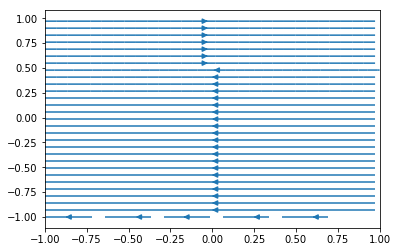

In [35]:
v = np.linspace(-1, 1, num=50)
T = np.linspace(-1, 1, num=50)

plt.streamplot(v, T, p.portrait['dv'], p.portrait['dT'])

In [39]:
int(False)

0

# Citations

1. J Stat Phys (2017) 168:826–856
DOI 10.1007/s10955-017-1824-9
2. Combustion Theory
Williams, Forman A. 05 March 2018
3. https://journals.aps.org/pre/pdf/10.1103/PhysRevE.93.043203#c33
4. https://epubs.siam.org/doi/book/10.1137/1.9781611975109
5. http://www.personal.psu.edu/axb62/PSPDF/clawtut09.pdf
6. https://epubs.siam.org/doi/pdf/10.1137/1.9781611970562.ch1
7. Toro, Eleuterio F.. Riemann Solvers and Numerical Methods for Fluid Dynamics : A Practical Introduction, Springer, 2009. ProQuest Ebook Central, https://ebookcentral.proquest.com/lib/alamos/detail.action?docID=438075.